 <img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d@2x.png" width=300>
 
# AIGS Winter Camp  2023 @GIST
by Hyungon Ryu | NVAITC(NVIDIA AI Tech. Center)  Korea 


![](http://www.cse.or.kr/assets/img/logo_cse.png)

# Part 1 -  CNN Primer and Keras  


<br>
In this notebook you will be introduced to the concept of a convolutional neural network (CNN) and implement one using Keras. This notebook is designed as a starting point for absolute beginners to deep learning.

In this notebook you will be introduced to the concept of a convolutional neural network (CNN) and implement one using Keras. This notebook is designed as a starting point for absolute beginners to deep learning.

### Contents of this notebook:

 - How a deep learning project is planned
 - Wrapping things up with an example (classification)
  - Fully connected networks

### By the end of this notebook the participant will:

 - Understand machine learning pipelines
 - Write a deep learning classifier and train it


## Machine Learning Pipeline
During the bootcamp we will be making use of the following concepts to help us understand how a machine learning (ML) project should be planned and executed:

 1. <B>Data</B>: To start any ML project we need data which is pre-processed and can be fed into the network.
 2. <B>Task</B>: There are many possible tasks in the field of ML; we need to make sure we understand and define the problem statement accurately.
 3. <B>Model</B>: We need to build our model, which is neither too deep (requiring a lot of computational power) nor too small (preventing it from learning the important features).
 4. <B>Loss</B>: Out of the many loss functions that can be defined, we need to carefully choose one which is suitable for the task we are about to carry out.
 5. <B>Learning</B>: There are a variety of optimisers, each with their advantages and disadvantages. We must choose one which is suitable for our task and train our model using some suitably chosen hyperparameters.
 6. <B>Evaluation</B>: We must determine if our model has learned the features properly by analysing how it performs on data it has not previously seen.

### Step by Step  DL training 

#### load keras module

In [1]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Image classification on types of clothes


We will be using the Fashion MNIST dataset, which is a very popular introductory dataset in deep learning. This dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

![fashin mnist](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/fashion-mnist.png)

#### prepare dataset

In [2]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

 - The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.
 - The model is tested against the test set, the `test_images`, and `test_labels` arrays.


#### understand dataset

In [3]:
# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


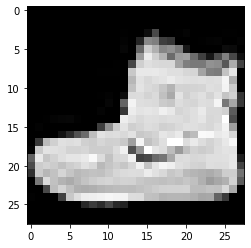

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

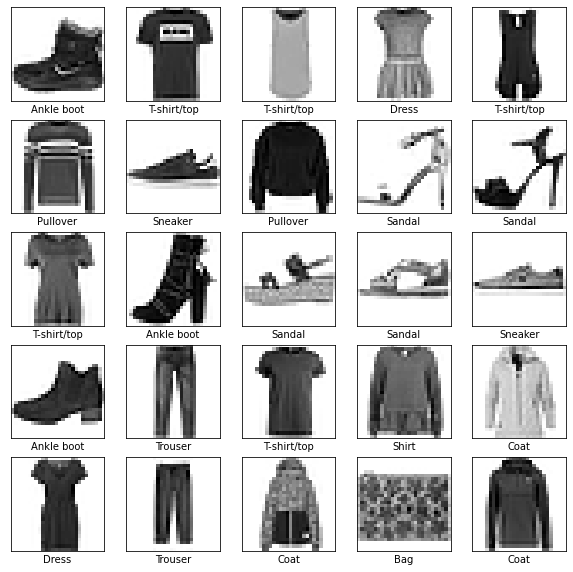

In [6]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### preprocessing

The image pixel values range from 0 to 255. Let us now normalise the data range from 0 - 255 to 0 - 1 in both the Train and Test set. This normalisation of pixels helps us by optimizing the process where the gradients are computed.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

------------------------------------

# MLP(Multi Layer Perceptron)

## simple MLP model

# Building a Neuron

Neurons are the fundamental building blocks to a neural network. Just like how biological neurons send an electrical impulse under specific stimuli, artificial neural networks similarly result in a numerical output with a given numerical input.

We can break down building a neuron into 3 steps:

 - Defining the architecture
 - Intiating training ( compile)
 - Evaluating the model

![](https://camo.githubusercontent.com/b1cabba25cf7982d07a2a8ad60f344a0a69b463a75896d03c0e05ee02253a3bc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f312f31302f426c617573656e5f303635375f4d756c7469706f6c61724e6575726f6e2e706e672f35313270782d426c617573656e5f303635375f4d756c7469706f6c61724e6575726f6e2e706e67)

Image courtesy of Wikimedia Commons

Biological neurons transmit information with a mechanism similar to Morse Code. It receives electrical signals through the dendrites, and under the right conditions, sends an electrical impulse down the axon and out through the terminals.

It is theorized the sequence and timing of these impulses play a large part of how information travels through the brain. Most artificial neural networks have yet to capture this timing aspect of biological neurons, and instead emulate the phenomenon with simpler mathematical formulas.

# The Math
Computers are built with discrete 0s and 1s whereas humans and animals are built on more continuous building blocks. Because of this, some of the first neurons attempted to mimic biological neurons with a linear regression function: $y = mx + b$. The $x$ is like information coming in through the dendrites and the $y$ is like the output through the terminals. As the computer guesses more and more answers to the questions we present it, it will update its variables ($m$ and $b$) to better fit the line to the data it has seen.

Neurons are often exposed to multivariate data. We're going to build a neuron that takes each  value ( float), and assign it a weight, which is equivalent to our m. Data scientists often express this weight as w. For example, the first variable will have a weight of `w0`, the second will have a weight of `w1`, and so on. Our full equation becomes `y = w0x0 + w1x1 + w2x2 + ... + b`. 

Each observatio have 10 variables, so we will have a total of 10 weights. All values of variables are normalized.  Each number below will be assigned a weight.

#### Defining our model

Our model has three layers:

 - 10 input features (10 variables)
 - 512 nodes in the hidden layer (feel free to experiment with this value) 
 - 1 output nodes to denote the class

We assume the input is 1d array. the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 512 nodes (or neurons). The second (and last) layer is a 1-node dense layer that returns an float variable to regresstion. 



#### define model

In [8]:
from tensorflow.keras import backend as K
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### compile the model


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

 - <B>Loss function</B> —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. See KERAS's [loss functions](https://keras.io/api/losses/) section
 - <B>Optimizer</B> —This is how the model is updated based on the data it sees and its loss function. See Keras [Optimizer](https://keras.io/api/optimizers/) Section
 - <B>Metrics</B> —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. See Keras's [Metrics](https://keras.io/api/metrics/) section

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### train the model 
Training the neural network model requires the following steps:

 1. Feed the training data to the model. In this example, the training data is in the `train_images`  and `train_labels` arrays.
 2. The model learns to associate multi variables and output.
 3. You ask the model to make predictions about a test set—in this example, the   `test_images` array. Verify that the predictions match the labels from the `test_labels` array.
 To start training, call the `model.fit` method—so called because it "fits" the model to the training data:

In [10]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.5493 - accuracy: 0.8127 - val_loss: 0.4647 - val_accuracy: 0.8360
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4053 - accuracy: 0.8584 - val_loss: 0.4090 - val_accuracy: 0.8566
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3682 - accuracy: 0.8692 - val_loss: 0.4017 - val_accuracy: 0.8555
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3432 - accuracy: 0.8771 - val_loss: 0.3790 - val_accuracy: 0.8658
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3232 - accuracy: 0.8826 - val_loss: 0.3569 - val_accuracy: 0.8715
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3038 - accuracy: 0.8899 - val_loss: 0.3588 - val_accuracy: 0.8706
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2912 - accuracy: 0.8930 - val_loss: 0.3458 - val_accuracy: 0.8770
Epoch 

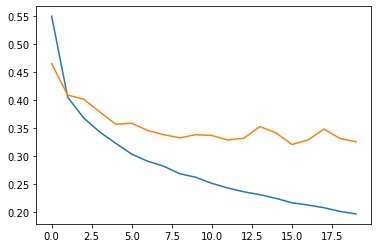

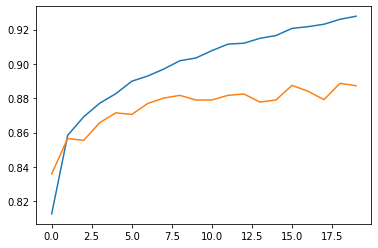

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

#### Evaluate accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images ,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3260 - accuracy: 0.8873 - 615ms/epoch - 2ms/step


In [13]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

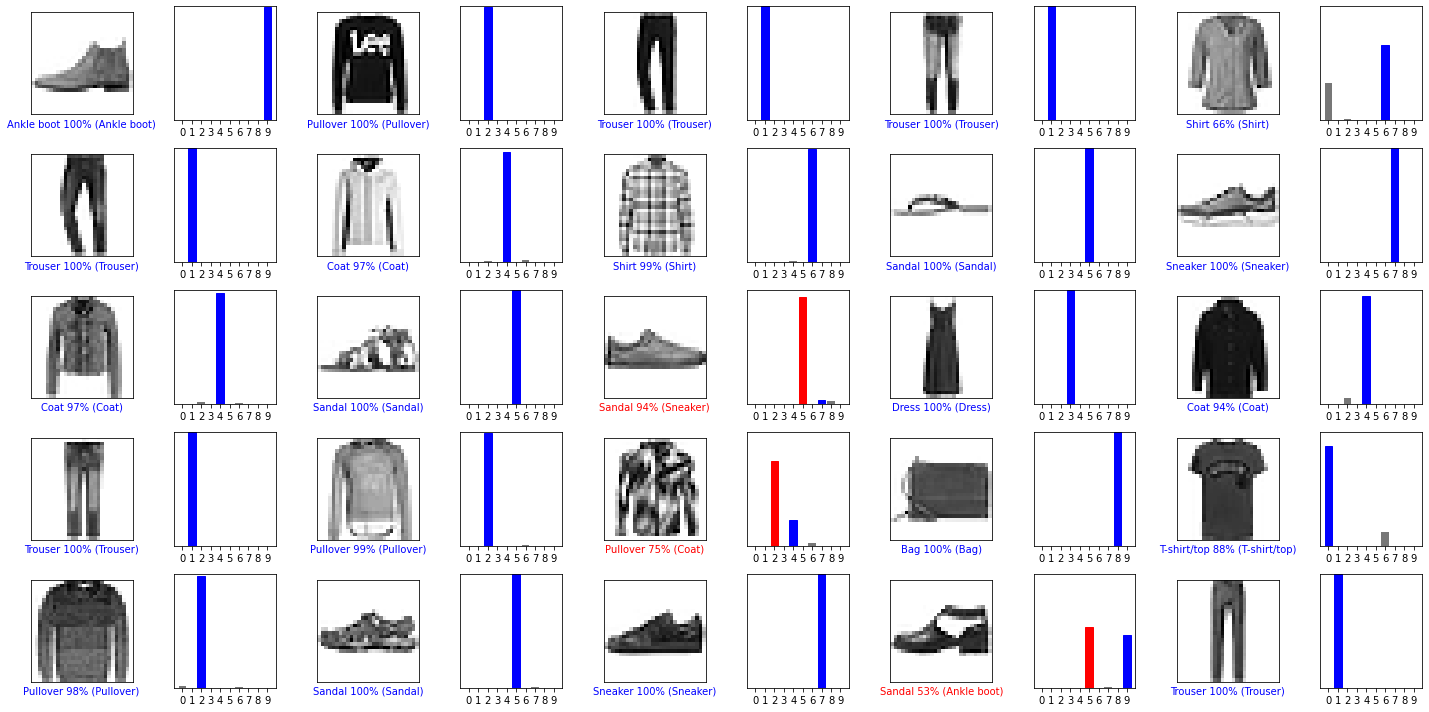

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

----------------------------------

# CNN(Convolutional Neural Network)

## Implementing Image Classification using CNNs

In [30]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


#### preprocessnig

You may have noticed by now that the training set is of shape `(60000,28,28)`.

In convolutional neural networks, we need to feed the data in the form of a 4D Array as follows:

`(num_images, x-dims, y-dims, num_channels_per_image)`

So, as our image is grayscale, we will reshape it to `(60000,28,28,1)` before passing it to our neural network architecture.

In [32]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

## Defining Convolution Layers


Let us see how to define convolution, max pooling, and dropout layers.

### Convolution Layer
We will be using the following API to define the Convolution Layer.

`tf.keras.layers.Conv2D(filters, kernel_size, padding='valid', activation=None, input_shape)`

Let us briefly define the parameters:

 - <B>filters</B>: The dimensionality of the output space (i.e. the number of output filters in the convolution).
 - <B>kernel_size</B>: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
 - <B>padding</B>: One of "valid" or "same" (case-insensitive).
 - <B>activation</B>: Activation function to use (see activations). If you don't specify anything, no activation is applied (i.e. "linear" activation: a(x) = x).

Documentation: [Convolutional Layers](https://keras.io/layers/convolutional/)

### Pooling Layer
`tf.keras.layers.MaxPooling2D(pool_size=2)`

 - <B>pool_size</B>: Size of the max pooling window.
Documentation: [Pooling Layers](https://keras.io/layers/pooling/)

### Dropout
Dropout is an approach to regularization in neural networks which helps reduce interdependent learning amongst the neurons.

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase, with a certain set of neurons chosen at random. By “ignoring," we mean these units are not considered during a particular forward or backward pass.

It is defined by the following function:

`tf.keras.layers.Dropout(0.3)`

 - Parameter: Fraction of the input units to drop (float between 0 and 1).
Documentation: [Dropout](https://keras.io/layers/core/#dropout)

## define the model

Now that we are aware of the code for building a CNN, let us now build a five layer model:

- Input layer: (28, 28, 1)
  - Size of the input image
- Convolution layers:
  - First layer: Kernel size (3 x 3), resulting in 32 channels.
   - Pooling of size (2 x 2) makes the layer (14 x 14 x 64)
  - Second layer: Kernel size (3 x 3), resulting in 64 channels.
   - Pooling of size (2 x 2) makes the layer (7 x 7 x 32)
- Fully connected layers:
  - Flatten the convolution layers to 1567 nodes = (7 * 7 * 32)
  - Dense layer of size 256
- Output layer:
  - Dense layer with 10 classes using softmax activation

  ![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/our_cnn.png)

Now we can define our model in Keras.

In [19]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# Second convolution layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

# Fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

#### compile the model


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

 - <B>Loss function</B> —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. See KERAS's [loss functions](https://keras.io/api/losses/) section
 - <B>Optimizer</B> —This is how the model is updated based on the data it sees and its loss function. See Keras [Optimizer](https://keras.io/api/optimizers/) Section
 - <B>Metrics</B> —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. See Keras's [Metrics](https://keras.io/api/metrics/) section

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### train the model

Training the neural network model requires the following steps:

 1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
 2. The model learns to associate images and labels.
 3. You ask the model to make predictions about a test set—in this example, the  `test_images` array. Verify that the predictions match the labels from the `test_labels` array.
 
To start training, call the `model.fit` method—so called because it "fits" the model to the training data:

In [21]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 9s 8ms/step - loss: 0.4676 - accuracy: 0.8341 - val_loss: 0.3578 - val_accuracy: 0.8709
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3047 - accuracy: 0.8902 - val_loss: 0.2997 - val_accuracy: 0.8949
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2580 - accuracy: 0.9066 - val_loss: 0.2781 - val_accuracy: 0.8971
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2271 - accuracy: 0.9175 - val_loss: 0.2835 - val_accuracy: 0.8923
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2044 - accuracy: 0.9254 - val_loss: 0.2470 - val_accuracy: 0.9100
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1846 - accuracy: 0.9317 - val_loss: 0.2437 - val_accuracy: 0.9138
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1642 - accuracy: 0.9393 - val_loss: 0.2326 - val_accuracy: 0.9188
Epoch 

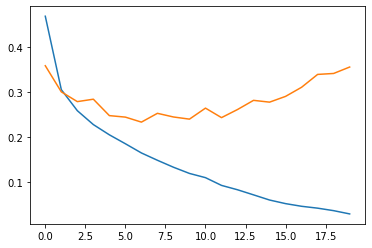

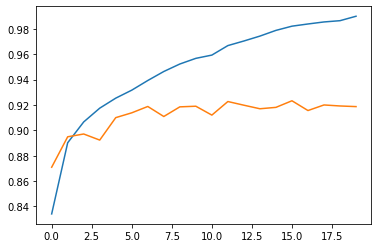

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [33]:
# Evaluating the model using the test set

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3548 - accuracy: 0.9187 - 688ms/epoch - 2ms/step

Test accuracy: 0.9186999797821045


## Making Predictions

In [34]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [36]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

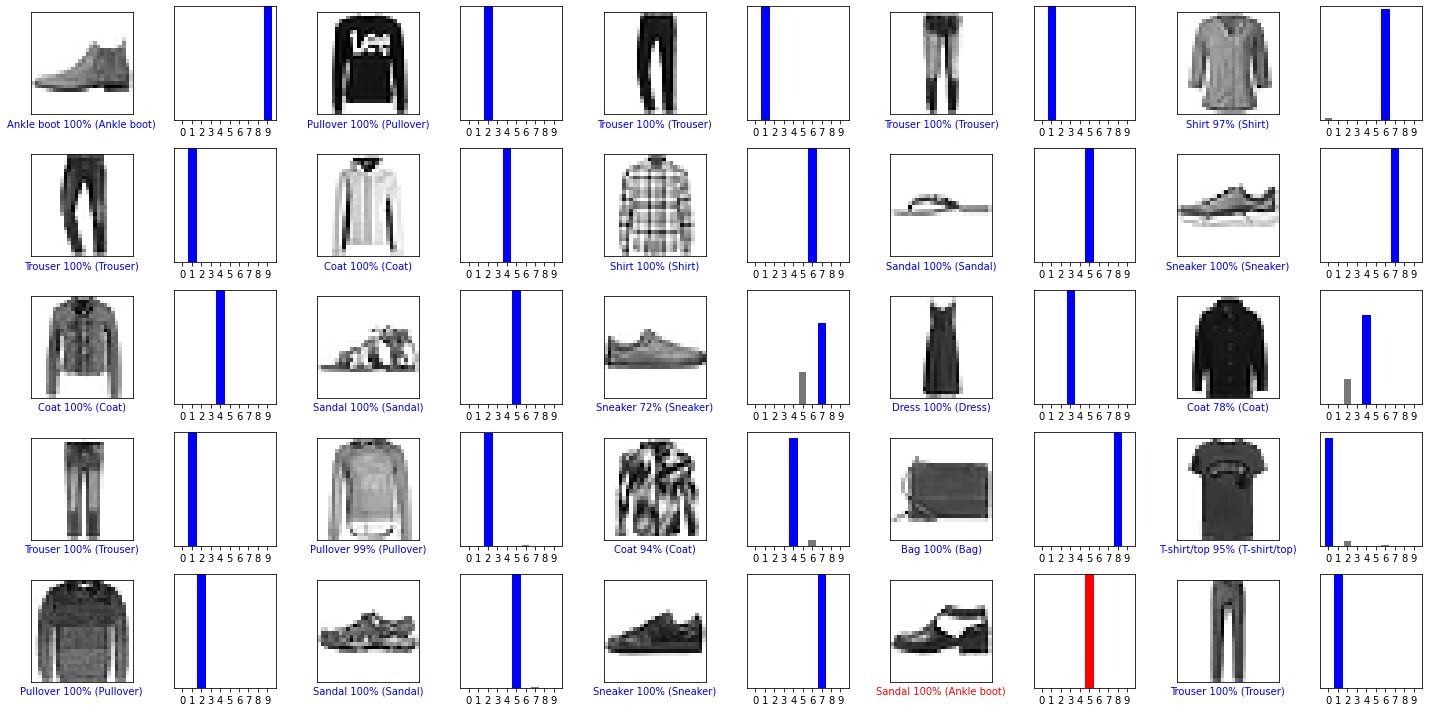

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion
Running  our models , check the result and comparing them (your results may be slightly different):

### add dropout layers and compare the result 

In [38]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Second convolution layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.6328 - accuracy: 0.7697 - val_loss: 0.4061 - val_accuracy: 0.8509
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4265 - accuracy: 0.8464 - val_loss: 0.3443 - val_accuracy: 0.8775
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3754 - accuracy: 0.8647 - val_loss: 0.3164 - val_accuracy: 0.8873
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3434 - accuracy: 0.8771 - val_loss: 0.2914 - val_accuracy: 0.8927
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3205 - accuracy: 0.8846 - val_loss: 0.2773 - val_accuracy: 0.8988
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3058 - accuracy: 0.8893 - val_loss: 0.2664 - val_accuracy: 0.9017
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2914 - accuracy: 0.8948 - val_loss: 0.2654 - val_accuracy: 0.9040
Epoch 

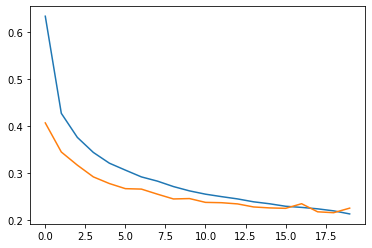

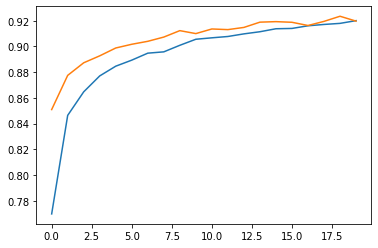

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [43]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

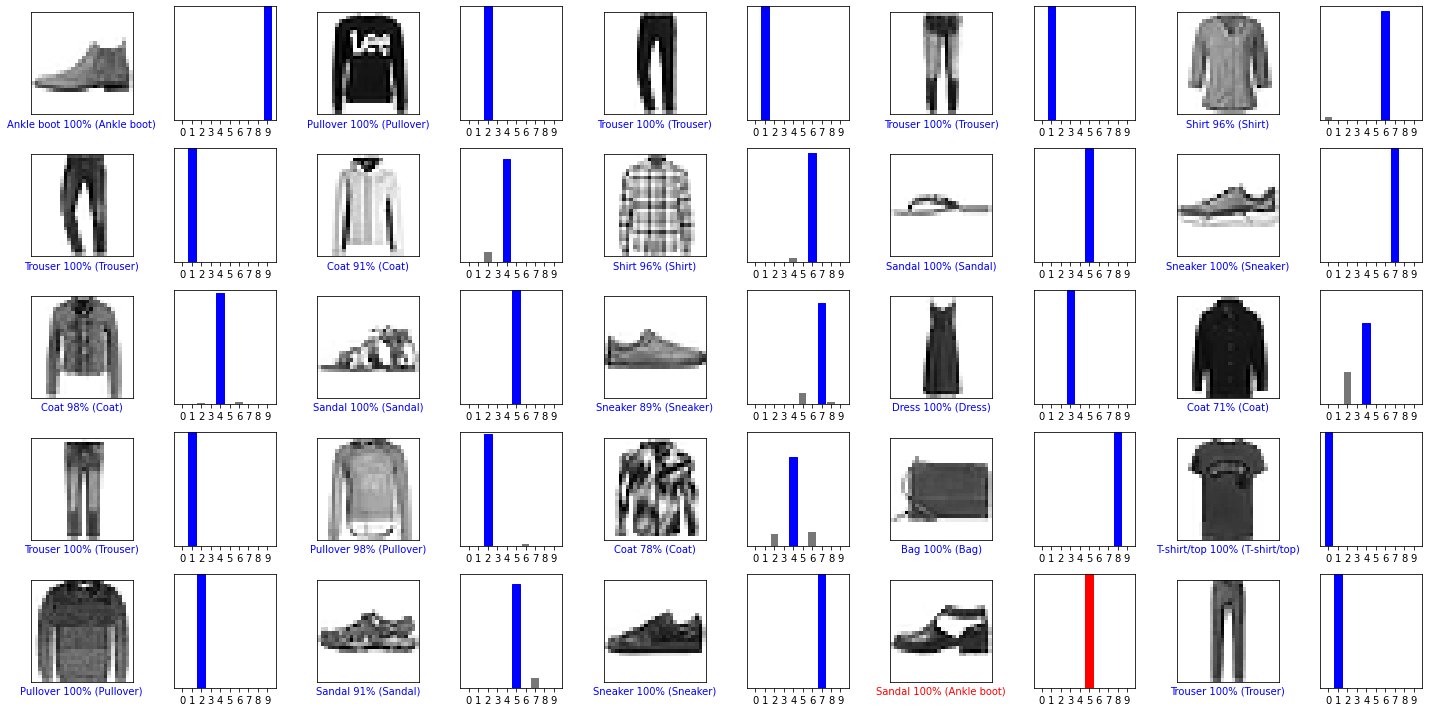

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------

# ResNet ( Residual Network) 



Residual Networks
We discovered that learning in a convolutional neural network is hierarchical: each increase in the number of layers results in more complex features being learned by the layers. But despite this, it is shown empirically that there is a maximum threshold for depth with a traditional CNN model.

In a paper titled Deep Residual Learning for Image Recognition researchers from Microsoft pointed out the following:
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/resnet.PNG)

The failure of the 56-layer CNN could be blamed on the optimization function, initialization of the network, or the famous vanishing/exploding gradient problem. Vanishing gradients are exceptionally easy to blame for this.

So what is the vanishing gradient problem? When we do backpropagation, the gradients tend to get smaller and smaller as we keep on moving backwards in the network. This means that the neurons in the earlier layers learn very slowly as compared to the neurons in the later layers in the hierarchy. The earlier layers in the network are slowest to train.

Earlier layers in the network are essential because they are responsible for learning and detecting the simple patterns and are actually the building blocks of our network. If they give improper and inaccurate results, we can't expect the next layers and the complete network to perform nicely and produce accurate results.

The problem of training very deep networks has been alleviated with the introduction of a new neural network layer — the residual block.

Optional - The Degradation Problem

The degradation problem suggests that solvers might have difficulties in approximating identity mappings by multiple nonlinear layers without the residual learning reformulation.

Let us consider network A having  layers and network B having  layers. Supposing that , if network A performs poorly relative to network B, one might argue that if network A had mapped an identity function for the first  layers, then it would have performed on par with network B. But it doesn't do that due to the vanishing gradient problem, so when we use residual networks, the network gets the input along with learning on the residual, and if the input function was appropriate, it could quickly change the weights of the residual function to be zero.



## Residual Blocks
In a residual block the activation of a layer is fast-forwarded to a deeper layer in the neural network. Residual blocks help in the flow of information from the initial layers to the final layers. This is done by the introduction of skip connections, as seen in the image below.

Let us consider $H(x)$  as an underlying mapping to be fit by a few stacked layers (not necessarily the entire net), with  denoting the inputs to the first of these layers. If one hypothesizes that multiple nonlinear layers can asymptotically approximate complicated functions, then it is equivalent to hypothesize that they can asymptotically approximate the residual functions, i.e.,  (assuming that the input and output are of the same dimensions).

So rather than expecting the stacked layers to approximate $H(x)$, we explicitly let these layers approximate a residual function.

$F(x) = H(x) − x$.

The original function thus becomes $F(x)+x$ .

Although both models should be able to approximate the desired functions asymptotically, the ease of learning might be different. This reformulation is motivated by the counterintuitive phenomena about the degradation problem. As we discussed above, if the added layers can be constructed as identity mappings, a deeper model should have training error no greater than its shallow counterpart.
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/resblock.PNG)

With this, increasing the number of layers improves accuracy. Here are some results from the paper:
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/stats.png)

Now let us see how to write a residual block in Keras.

In [46]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [47]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [48]:
# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
# Printing the Size of our Dataset

# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


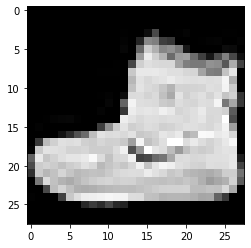

In [50]:
# Data Preprocessing 

plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [51]:
train_images = train_images / 255.0
test_images = test_images / 255.0

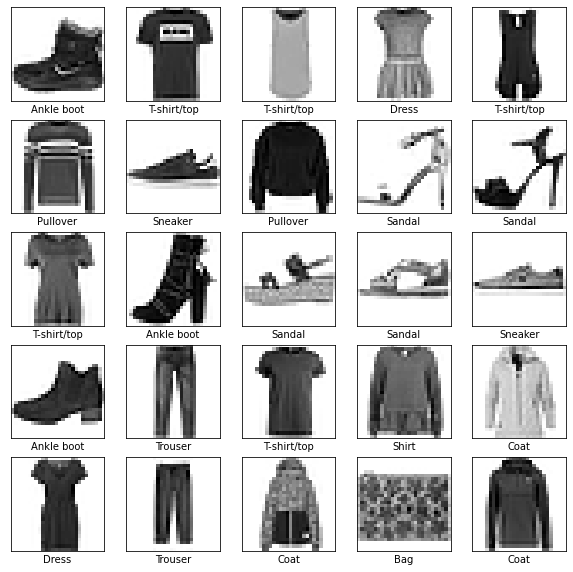

In [52]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [53]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# Model
Let's build a resnet model with Keras and train it.

We will be using two kinds of residual blocks:

 - Identity Block
 - Convolution Block

 ## Identity Block
In the identity block we have a skip connection with no change in input, paired with a standard set of convolutional layers.

![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/identity.png)

## Convolution Block
The convolution block is very similar to the identity block, but there is a convolutional layer in the skip-connection path just to change the dimension such that the dimension of the input and output matches.
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/conv.png)

Let's start building the identity block:

In [54]:
def identity_block(X, f, filters, stage, block, dropout=0.1):
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D
    from keras.layers import Input, Conv2D

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve filters
    F1, F2, F3 = filters
    
    # A path is a block of conv followed by batch normalization and activation
    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    if dropout > 0.0:
        X = Dropout(dropout)(X)    
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

Convolution Block
Notice the only change we need to do is add a convolution and batch normalisation for the input data to match the output dimension.

This can be done by adding the following lines :


```
##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)
```    

In [55]:
def convolutional_block(X, f, filters, stage, block, s=2, dropout=0.1):
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D
    from keras.layers import Input, Conv2D
    
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    if dropout> 0.1:
        X = Dropout(dropout)(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [56]:
def ResNet(input_shape = (28, 28, 1), classes = 10, dropout=0.1):
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D
    from keras.layers import Input, Conv2D    

    # Define the input as a tensor with shape input_shape
    X_input = Input(shape=input_shape)


    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (3, 3), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1, dropout=dropout)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b',  dropout=dropout)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c', dropout=dropout)

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 3, block='a', s=2, dropout=dropout)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 3, block='b', s=2, dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c', dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d', dropout=dropout)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 3, block='e', s=2, dropout=dropout)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 3, block='f', s=2, dropout=dropout) 
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='g', dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='h', dropout=dropout)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 3, block='i', s=2, dropout=dropout)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 3, block='j', s=2, dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='k', dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='l', dropout=dropout) 

    # Stage 4 (last)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage = 4, block='a', s=2, dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='b', dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='c', dropout=dropout)
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='d', dropout=dropout)


    # AVGPOOL
    X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet')

    return model

In [57]:
from tensorflow.keras import backend as K
K.clear_session()
TODO_dropout_value = 0.3 #  TODO dropout value =  compare 0.0 and 0.3 
model = ResNet(input_shape = (28, 28, 1), classes = 10, dropout=TODO_dropout_value)
model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 16, 16, 64)   640         ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1[0][0]']                  
                                                                                             

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 28s 43ms/step - loss: 1.7266 - accuracy: 0.3419 - val_loss: 1.1961 - val_accuracy: 0.5227
Epoch 2/20
469/469 [==============================] - 19s 40ms/step - loss: 0.9028 - accuracy: 0.6493 - val_loss: 0.7584 - val_accuracy: 0.7273
Epoch 3/20
469/469 [==============================] - 22s 46ms/step - loss: 0.7028 - accuracy: 0.7332 - val_loss: 0.5749 - val_accuracy: 0.7813
Epoch 4/20
469/469 [==============================] - 20s 43ms/step - loss: 0.6014 - accuracy: 0.7720 - val_loss: 0.5018 - val_accuracy: 0.8117
Epoch 5/20
469/469 [==============================] - 21s 44ms/step - loss: 0.5206 - accuracy: 0.8056 - val_loss: 0.4479 - val_accuracy: 0.8352
Epoch 6/20
469/469 [==============================] - 20s 42ms/step - loss: 0.4649 - accuracy: 0.8278 - val_loss: 0.4239 - val_accuracy: 0.8479
Epoch 7/20
469/469 [==============================] - 18s 39ms/step - loss: 0.4230 - accuracy: 0.8447 - val_loss: 0.3681 - val_accuracy:

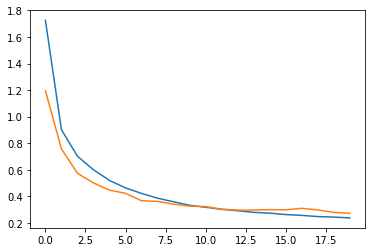

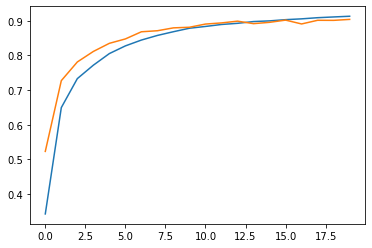

In [62]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

## Making Predictions

In [63]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 4s 8ms/step


In [64]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)

# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

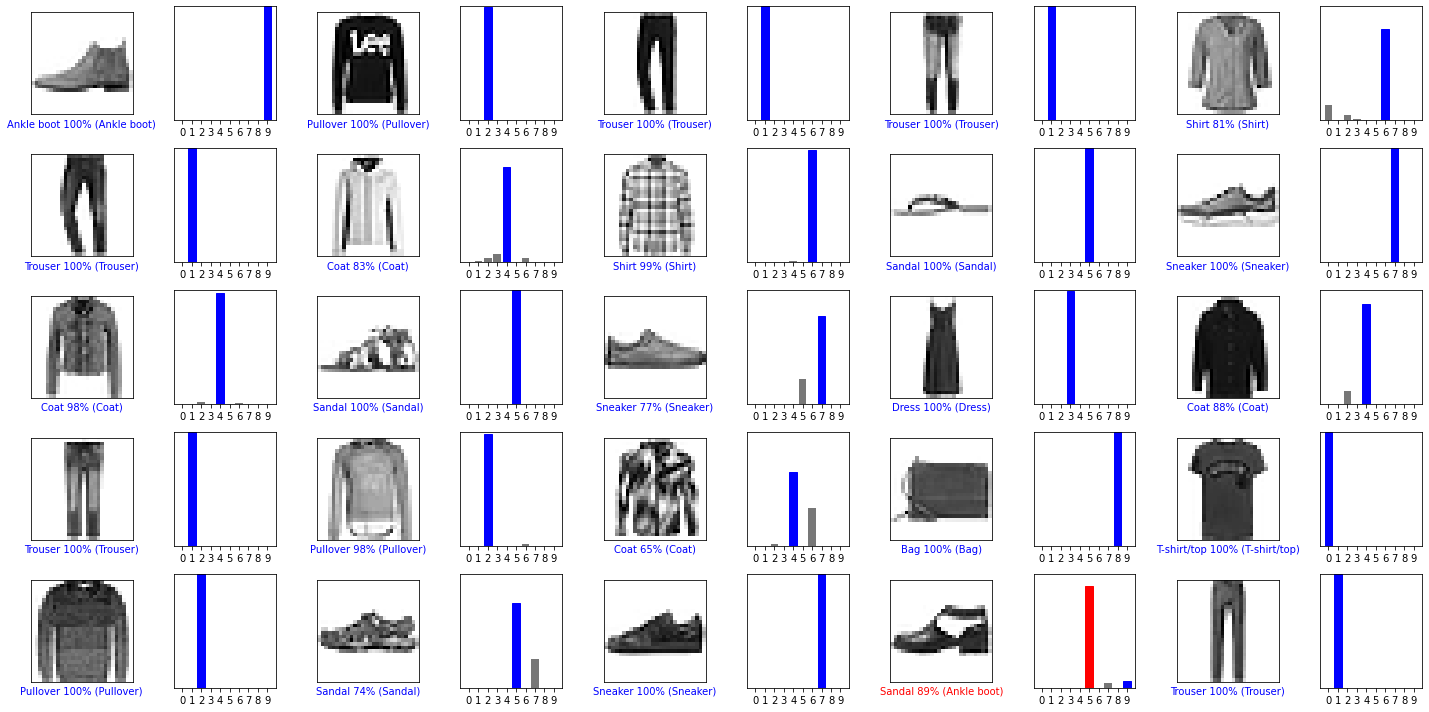

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Conclusion

Running all of our models for five epochs, and check the result and compare them

# ViT Model

![ViT](https://production-media.paperswithcode.com/methods/Screen_Shot_2021-01-26_at_9.43.31_PM_uI4jjMq.png)

# CIFAR 10 dataset 
![CIFAR10](https://miro.medium.com/max/1182/1*OSvbuPLy0PSM2nZ62SbtlQ.png)

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


In [71]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 20
image_size = 72  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 128
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [72]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [73]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [74]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1,  1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 16 X 16
Patches per image: 16
Elements per patch: 768


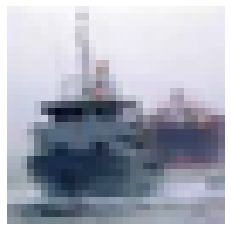

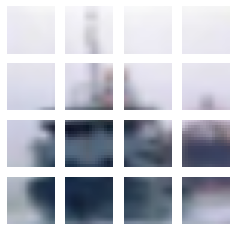

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [76]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [77]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [80]:
def run_experiment(model):
    optimizer = tf.keras.optimizers.experimental.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/content/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_2_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 2 accuracy: {round(top_2_accuracy * 100, 2)}%")

    return history

In [81]:
vit_classifier = create_vit_classifier()
vit_classifier.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 72, 72, 3)   7           ['input_3[0][0]']                
                                                                                                  
 patches_3 (Patches)            (None, None, 768)    0           ['data_augmentation[1][0]']      
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 16, 128)     100480      ['patches_3[0][0]']              
                                                                                            

In [82]:
history = run_experiment(vit_classifier)

Epoch 1/20
352/352 [==============================] - 71s 124ms/step - loss: 2.3071 - accuracy: 0.0972 - top-2-accuracy: 0.1981 - val_loss: 2.3026 - val_accuracy: 0.1058 - val_top-2-accuracy: 0.2034
Epoch 2/20
352/352 [==============================] - 40s 114ms/step - loss: 2.3026 - accuracy: 0.1014 - top-2-accuracy: 0.2002 - val_loss: 2.3026 - val_accuracy: 0.0950 - val_top-2-accuracy: 0.1926
Epoch 3/20
352/352 [==============================] - 42s 118ms/step - loss: 2.3026 - accuracy: 0.1002 - top-2-accuracy: 0.2006 - val_loss: 2.3026 - val_accuracy: 0.0976 - val_top-2-accuracy: 0.2034
Epoch 4/20
352/352 [==============================] - 41s 117ms/step - loss: 2.3026 - accuracy: 0.0998 - top-2-accuracy: 0.1980 - val_loss: 2.3026 - val_accuracy: 0.0970 - val_top-2-accuracy: 0.2008
Epoch 5/20
352/352 [==============================] - 40s 113ms/step - loss: 2.3026 - accuracy: 0.1020 - top-2-accuracy: 0.2019 - val_loss: 2.3026 - val_accuracy: 0.0976 - val_top-2-accuracy: 0.2000
Epoch

# conclusion
check accuracy with ViT model. 

# MLP Mixer
with fasthion  MNIST dataset again.

In [89]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [90]:
# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [91]:
# Printing the Size of our Dataset

# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


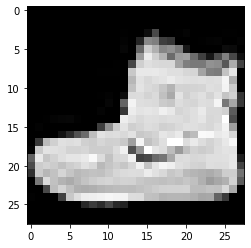

In [92]:
# Data Preprocessing 

plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [93]:
train_images = train_images / 255.0
test_images = test_images / 255.0

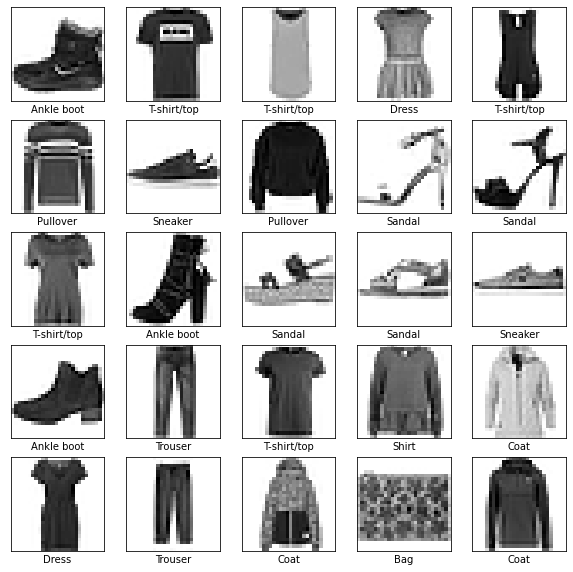

In [94]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [95]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# MLP-mixer

replace MHA(multi head attention) layer and FF(Feed forward) layer with MLP

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2021-07-20_at_12.09.16_PM_aLnxO7E.png)

see keras implementation for [MLP-mixer](https://github.com/Benjamin-Etheredge/mlp-mixer-keras/blob/main/mlp_mixer_keras/mlp_mixer.py)

## MLP block

it have two dense layer with bottleneck design

In [96]:
from tensorflow import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.pooling import MaxPooling2D, MaxPooling1D,  GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers import Input, Conv2D   

from tensorflow.keras.layers import (
    Add,
    Layer,
    LayerNormalization,
    Permute,
    Softmax,
)


class MlpBlock(Layer):
    def __init__(
        self,
        dim: int,
        hidden_dim: int,
        activation=None,
        dropout : float=None,
        **kwargs
    ):
        super(MlpBlock, self).__init__(**kwargs)

        if activation is None:
            activation = keras.activations.gelu

        self.dim = dim
        self.hidden_dim = dim
        self.dense1 = Dense(hidden_dim)
        self.activation = Activation(activation)
        self.dense2 = Dense(dim)
        self.dropout = dropout

    def call(self, inputs):
        x = inputs
        x = self.dense1(x)
        x = self.activation(x)
        x = self.dense2(x)
        if self.dropout> 0.1:
            x = Dropout(self.dropout)(x)
        return x

    def compute_output_shape(self, input_signature):
        return (input_signature[0], self.dim)

    def get_config(self):
        config = super(MlpBlock, self).get_config()
        config.update({
            'dim': self.dim,
            'hidden_dim': self.hidden_dim
        })
        return config



### mixer block

it also include transpose and skip connection ( pre/post norm option)

In [97]:


class MixerBlock(Layer):
    def __init__(
        self,
        num_patches: int,
        channel_dim: int,
        token_mixer_hidden_dim: int,
        channel_mixer_hidden_dim: int = None,
        activation=None,
        dropout : float=None,
        **kwargs
    ):
        super(MixerBlock, self).__init__(**kwargs)

        self.num_patches = num_patches
        self.channel_dim = channel_dim
        self.token_mixer_hidden_dim = token_mixer_hidden_dim
        self.channel_mixer_hidden_dim = channel_mixer_hidden_dim
        self.activation = activation
        self.dropout = dropout

        if activation is None:
            self.activation = keras.activations.gelu

        if channel_mixer_hidden_dim is None:
            channel_mixer_hidden_dim = token_mixer_hidden_dim

        self.norm1 = LayerNormalization(axis=1)
        self.permute1 = Permute((2, 1))
        self.token_mixer = MlpBlock(num_patches, token_mixer_hidden_dim, name='token_mixer', dropout=self.dropout)

        self.permute2 = Permute((2, 1))
        self.norm2 = LayerNormalization(axis=1)
        self.channel_mixer = MlpBlock(channel_dim, channel_mixer_hidden_dim, name='channel_mixer', dropout=self.dropout)

        self.skip_connection1 = Add()
        self.skip_connection2 = Add()

    def call(self, inputs):
        x = inputs
        skip_x = x
        x = self.norm1(x)
        x = self.permute1(x)
        x = self.token_mixer(x)

        x = self.permute2(x)

        x = self.skip_connection1([x, skip_x])
        skip_x = x

        x = self.norm2(x)
        x = self.channel_mixer(x)

        x = self.skip_connection2([x, skip_x])  # TODO need 2?

        return x

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        config = super(MixerBlock, self).get_config()
        config.update({
            'num_patches': self.num_patches,
            'channel_dim': self.channel_dim,
            'token_mixer_hidden_dim': self.token_mixer_hidden_dim,
            'channel_mixer_hidden_dim': self.channel_mixer_hidden_dim,
            'activation': self.activation,
        })
        return config

## MLP-Mixer
original MLP-Mixer use input as patched image.

In [98]:

def MlpMixerModel(
        input_shape: int,
        num_classes: int,
        num_blocks: int,
        patch_size: int,
        hidden_dim: int,
        tokens_mlp_dim: int,
        channels_mlp_dim: int = None,
        use_softmax: bool = False,
        dropout : float=None ,
):
    height, width, _ = input_shape

    if channels_mlp_dim is None:
        channels_mlp_dim = tokens_mlp_dim

    num_patches = (height*width)//(patch_size**2)  # TODO verify how this behaves with same padding

    inputs = keras.Input(input_shape)
    x = inputs

    x = Conv2D(hidden_dim,
               kernel_size=patch_size,
               strides=patch_size,
               padding='same',
               name='projector')(x)

    x = keras.layers.Reshape([-1, hidden_dim])(x)

    for _ in range(num_blocks):
        x = MixerBlock(num_patches=num_patches,
                       channel_dim=hidden_dim,
                       token_mixer_hidden_dim=tokens_mlp_dim,
                       channel_mixer_hidden_dim=channels_mlp_dim,
                       dropout = dropout )(x)

    x = GlobalAveragePooling1D()(x)  # TODO verify this global average pool is correct choice here

    x = LayerNormalization(name='pre_head_layer_norm')(x)
    x = Dense(num_classes, name='head')(x)

    if use_softmax:
        x = Softmax()(x)
    return keras.Model(inputs, x)

In [100]:
model_mlp_mixer = MlpMixerModel(input_shape=train_images.shape[1:],
                      num_classes=len(np.unique(train_labels)), 
                      num_blocks=8, 
                      patch_size=4,
                      hidden_dim=128, 
                      tokens_mlp_dim=128,
                      channels_mlp_dim=128,
                      use_softmax=True,
                      dropout =0.3)


In [101]:
model_mlp_mixer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
hist = model_mlp_mixer.fit(train_images, train_labels, validation_data=(test_images, test_labels),  epochs = 20, batch_size = 128 )

Epoch 1/20
469/469 [==============================] - 38s 64ms/step - loss: 0.6320 - accuracy: 0.7732 - val_loss: 0.4663 - val_accuracy: 0.8319
Epoch 2/20
469/469 [==============================] - 29s 61ms/step - loss: 0.4165 - accuracy: 0.8460 - val_loss: 0.4300 - val_accuracy: 0.8465
Epoch 3/20
469/469 [==============================] - 29s 62ms/step - loss: 0.3768 - accuracy: 0.8620 - val_loss: 0.3850 - val_accuracy: 0.8616
Epoch 4/20
469/469 [==============================] - 30s 64ms/step - loss: 0.3549 - accuracy: 0.8698 - val_loss: 0.4034 - val_accuracy: 0.8576
Epoch 5/20
469/469 [==============================] - 29s 61ms/step - loss: 0.3319 - accuracy: 0.8781 - val_loss: 0.3653 - val_accuracy: 0.8712
Epoch 6/20
469/469 [==============================] - 29s 61ms/step - loss: 0.3220 - accuracy: 0.8811 - val_loss: 0.3570 - val_accuracy: 0.8705
Epoch 7/20
469/469 [==============================] - 29s 62ms/step - loss: 0.3122 - accuracy: 0.8861 - val_loss: 0.3566 - val_accuracy:

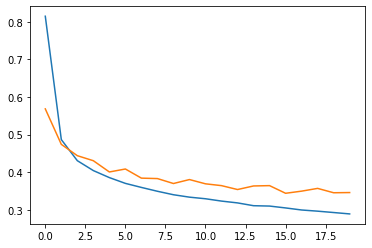

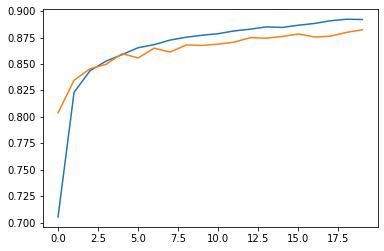

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) 
plt.show()

In [ ]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 4s 9ms/step


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)

# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

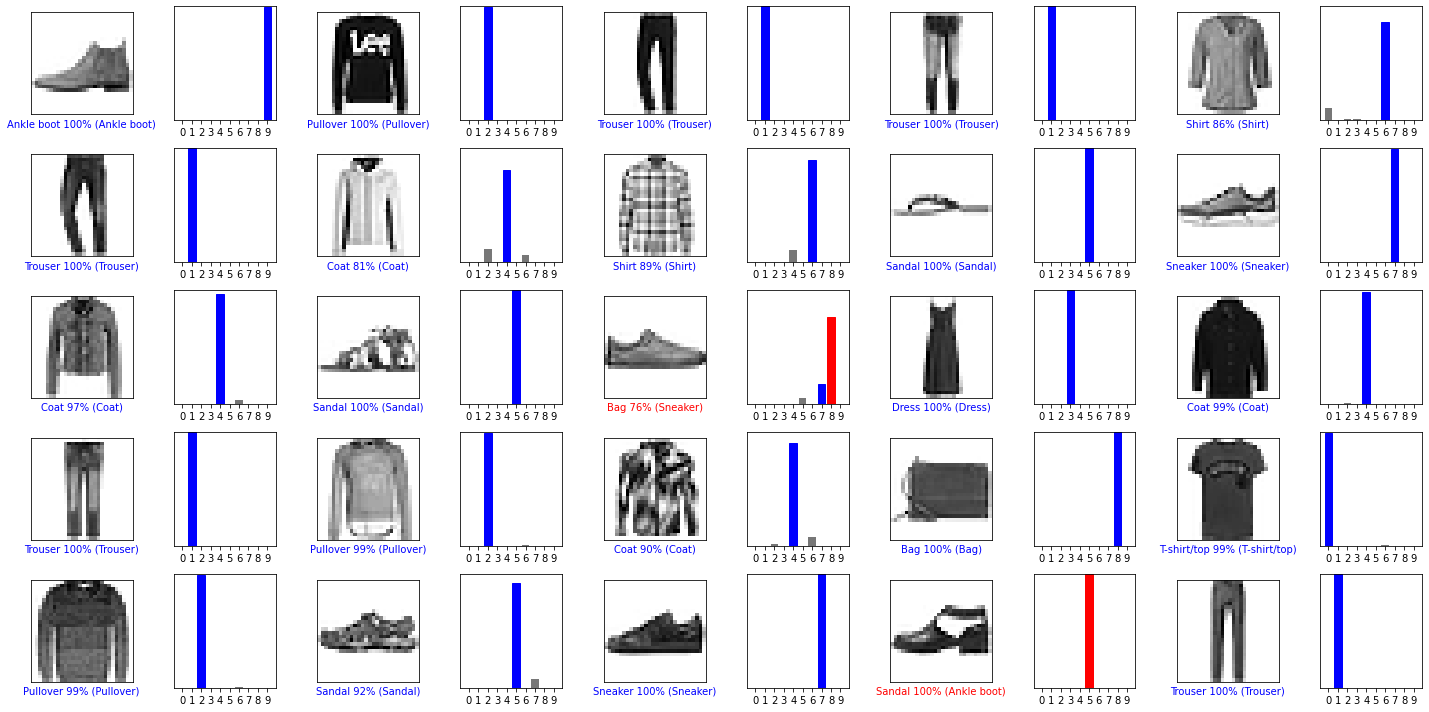

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## additional (Backup)

check pytorch version transformer.

 - [fast pitch](https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/SpeechSynthesis/FastPitch/fastpitch)
 - [transformer-XL](https://github.com/NVIDIA/DeepLearningExamples/blob/master/PyTorch/LanguageModeling/Transformer-XL/pytorch/mem_transformer.py)
 - [BERT](https://github.com/NVIDIA/DeepLearningExamples/blob/master/PyTorch/LanguageModeling/BERT/modeling.py)

and make your own MLP-Mixer model

In [ ]:
from torch import nn
import torch

import torch.nn as nn
import torch.functional as F
from random import random
from torch.autograd import Variable
from functools import partial

In [ ]:


class CoreNet(nn.Module):
    def __init__(self, 
                 in_features=8, 
                 expansion=2,  
                 fn='dense',
                 kernel_size=1, 
                 act_layer='gelu', 
                 drop=0.,
                 DEBUG=False):
        super(CoreNet, self).__init__()
                    
        self.core1 = nn.Linear(in_features,   in_features * expansion  )
        self.core2 = nn.Linear(in_features * expansion , in_features )                                   
            
        if act_layer=='gelu':
            self.act = nn.GELU()
        elif act_layer=='relu':
            self.act = nn.ReLU()            
          
        self.drop = nn.Dropout(drop)
    def forward(self, x, DEBUG=False):
        if DEBUG:
            print("    DEBUG CoreNet x                ", x.shape)
        x = self.core1(x)
        if DEBUG:
            print("    DEBUG CoreNet x after core1    ", x.shape)        
        x = self.act(x)
        if DEBUG:
            print("    DEBUG CoreNet x after act      ", x.shape)        
        x = self.drop(x)
        if DEBUG:
            print("    DEBUG CoreNet x after drop     ", x.shape)        
        x = self.core2(x)
        if DEBUG:
            print("    DEBUG CoreNet x after core2    ", x.shape)        
        x = self.drop(x)
        if DEBUG:
            print("    DEBUG CoreNet x after drop     ", x.shape)        
        return x

In [ ]:


class CoreBlock(nn.Module):
    def __init__(self, 
                 dim=8, 
                 n_tokens=21, 
                 expansion=2, 
                 drop=0., 
                 fn1='dense', 
                 fn2='dense', 
                 kernel_size=1, 
                 act1='gelu', 
                 act2='gelu',
                 DEBUG=False): # 197 = 16**2 + 1
        super(CoreBlock, self).__init__()
        #self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.DEBUG = DEBUG
        

    # FF over features
        self.corenet1 = CoreNet(in_features=dim, 
                                expansion=expansion, 
                                fn=fn1,
                                kernel_size=kernel_size, 
                                act_layer=act1, 
                                drop=drop,
                                DEBUG=self.DEBUG)            
        self.norm1 = nn.LayerNorm(dim)
        # FF over patches
        self.corenet2 = CoreNet(in_features=n_tokens, 
                                expansion=expansion, 
                                fn=fn2, 
                                kernel_size=kernel_size,
                                act_layer=act2, 
                                drop=drop,
                                DEBUG=self.DEBUG)
        self.norm2 = nn.LayerNorm(n_tokens)

    def forward(self, x, DEBUG=False):
        if DEBUG:
            print("  DEBUG CoreBlock:  init x          ", x.shape)
        
        #x = x + self.drop_path(self.corenet1(self.norm1(x),DEBUG=self.DEBUG))
        x = x + self.corenet1(self.norm1(x), DEBUG=self.DEBUG)
        if DEBUG:
            print("  DEBUG CoreBlock:  after run       ", x.shape)        
        x = x.transpose(-2, -1)
        if DEBUG:
            print("  DEBUG CoreBlock:  after transpose ", x.shape)   
            
        #x = x + self.drop_path(self.corenet2(self.norm2(x),DEBUG=self.DEBUG))
        x = x + self.corenet2(self.norm2(x),DEBUG=self.DEBUG)
        if DEBUG:
            print("  DEBUG CoreBlock:  after run       ", x.shape)                        
        x = x.transpose(-2, -1)
        if DEBUG:
            print("  DEBUG CoreBlock:  after transpose ", x.shape)                     
        return x


In [ ]:

class FFMixer(nn.Module):
    def __init__(self, 
                 input_dim = 7, 
                 output_dim = 11,
                 n_layers=12, 
                 d_model=8, 
                 n_tokens=29, 
                 expansion=2, 
                 drop=0.,
                 fn1='dense', 
                 fn2='dense', 
                 kernel_size=1, 
                 act1='gelu', 
                 act2='gelu',
                DEBUG=False):  
        super(FFMixer, self).__init__()        
        self.projection_pre =   nn.Linear(input_dim, d_model)
        self.projection_post =  nn.Linear(d_model, output_dim)
        self.n_layers = n_layers

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.d_model = d_model
        self.n_tokens= n_tokens
        self.expansion = expansion
        self.fn1=fn1
        self.nf2=fn2
        self.drop=drop
        self.DEBUG = DEBUG        



        self.layer = CoreBlock(dim=d_model, n_tokens=n_tokens, expansion=expansion, drop=drop, fn1=fn1, fn2=fn2, kernel_size=kernel_size, act1=act1, act2=act2, DEBUG=self.DEBUG)
        

        #self.layers = nn.ModuleList()

        #for _ in range(self.n_layers):
        #    self.layers.append(
        #        self.layer 
        #    )
        
        self.layers = nn.ModuleList([ CoreBlock(dim=d_model, n_tokens=n_tokens, expansion=expansion, drop=drop, fn1=fn1, fn2=fn2, kernel_size=kernel_size, act1=act1, act2=act2, DEBUG=self.DEBUG) for _ in range(self.n_layers)])
            
            
    def forward(self, x, DEBUG=False):
        if DEBUG: 
            print("DEBUG Mixer: init x ", x.shape)
        out = self.projection_pre(x)
        if DEBUG: 
            print("DEBUG Mixer: after pre ", out.shape)
        for i, layer in enumerate(self.layers):
            out = layer(out, DEBUG=self.DEBUG)
            if DEBUG: 
                print("DEBUG Mixer: loop ",i,  out.shape)            
        if DEBUG: 
            print("DEBUG Mixer: after layers ", out.shape)
        out = self.projection_post(out)
        if DEBUG: 
            print("DEBUG Mixer: after post ", out.shape)
        return out  

In [ ]:
from torch import nn
import torch

import torch.nn as nn
import torch.functional as F
from random import random
from torch.autograd import Variable
from functools import partial


def count_parameters(model, DEBUG=True):
    from prettytable import PrettyTable
    table = PrettyTable(["Modules", "Parameters",  "K Parameters",  "M Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: 
            continue
        param = parameter.numel()
        table.add_row([name, "{:>12d}".format(param), "{:>8.1f}".format(param/1000), "{:>3.1f}".format(param/1000000)])
        total_params+=param
    if DEBUG:
        print(table)
        print("Total Trainable Params: {:>12d} {:>8.2f}K {:>8.2f}M".format(total_params, total_params/1000, total_params/1000000) )
    return total_params
          

# RNN stack

In [ ]:
import torch
from torch import nn as nn
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F

from torch import nn

class BatchNormConv1d(nn.Module):
    def __init__(self, in_dim, out_dim, kernel_size, stride, padding,
                 activation=None):
        super(BatchNormConv1d, self).__init__()
        self.conv1d = nn.Conv1d(in_dim, out_dim,
                                kernel_size=kernel_size,
                                stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm1d(out_dim)
        self.activation = activation

    def forward(self, x):
        x = self.conv1d(x)
        if self.activation is not None:
            x = self.activation(x)
        return self.bn(x)
    
class CBHG(nn.Module):
    """CBHG module: a recurrent neural network composed of:
        - 1-d convolution banks
        - Highway networks + residual connections
        - Bidirectional gated recurrent units
    """

    def __init__(self, in_dim, K=16, projections=[128, 128]):
        super(CBHG, self).__init__()
        self.in_dim = in_dim
        self.relu = nn.ReLU()
        self.conv1d_banks = nn.ModuleList(
            [BatchNormConv1d(in_dim, in_dim, kernel_size=k, stride=1, padding=k // 2, activation=self.relu)
             for k in range(1, K + 1)])
        self.max_pool1d = nn.MaxPool1d(kernel_size=2, stride=1, padding=1)

        in_sizes = [K * in_dim] + projections[:-1]
        activations = [self.relu] * (len(projections) - 1) + [None]
        self.conv1d_projections = nn.ModuleList(
            [BatchNormConv1d(in_size, out_size, kernel_size=3, stride=1,  padding=1, activation=ac)
             for (in_size, out_size, ac) in zip(
                 in_sizes, projections, activations)])

        self.pre_highway = nn.Linear(projections[-1], in_dim, bias=False)
        self.highways = nn.ModuleList(
            [Highway(in_dim, in_dim) for _ in range(4)])

        self.gru = nn.GRU(            in_dim, in_dim, 1, batch_first=True, bidirectional=True)

    def forward(self, inputs, input_lengths=None):
        # (B, T_in, in_dim)
        x = inputs

        # Needed to perform conv1d on time-axis
        # (B, in_dim, T_in)
        if x.size(-1) == self.in_dim:
            x = x.transpose(1, 2)

        T = x.size(-1)

        # (B, in_dim*K, T_in)
        # Concat conv1d bank outputs
        x = torch.cat([conv1d(x)[:, :, :T] for conv1d in self.conv1d_banks], dim=1)
        assert x.size(1) == self.in_dim * len(self.conv1d_banks)
        x = self.max_pool1d(x)[:, :, :T]

        for conv1d in self.conv1d_projections:
            x = conv1d(x)

        # (B, T_in, in_dim)
        # Back to the original shape
        x = x.transpose(1, 2)

        if x.size(-1) != self.in_dim:
            x = self.pre_highway(x)

        # Residual connection
        x += inputs
        for highway in self.highways:
            x = highway(x)

        if input_lengths is not None:
            x = nn.utils.rnn.pack_padded_sequence(
                x, input_lengths, batch_first=True)

        # (B, T_in, in_dim*2)
        outputs, _ = self.gru(x)

        if input_lengths is not None:
            outputs, _ = nn.utils.rnn.pad_packed_sequence(
                outputs, batch_first=True)

        return outputs

class Highway(nn.Module):
    def __init__(self, in_size, out_size):
        super(Highway, self).__init__()
        self.H = nn.Linear(in_size, out_size)
        self.H.bias.data.zero_()
        self.T = nn.Linear(in_size, out_size)
        self.T.bias.data.fill_(-1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        H = self.relu(self.H(inputs))
        T = self.sigmoid(self.T(inputs))
        return H * T + inputs * (1.0 - T)

In [ ]:
class RNN_stack(nn.Module):
    def __init__(self, 
                 mel_dim=80, 
                 K = 16, 
                 linear_dim=1024):
        super(RNN_stack, self).__init__()
        self.mel_dim = mel_dim #80
        self.linear_dim = linear_dim # 1024

        self.rnnstage = CBHG(mel_dim, K=K, projections=[256, mel_dim])
        self.last_linear = nn.Linear(mel_dim * 2, linear_dim)

    def forward(self, inputs, DEBUG=False, denorm=False):
        # Post net processing below
        nframes_gt,  input_data  = inputs  # (B, T, nbin)
        linear_outputs = self.rnnstage(input_data)
        linear_outputs = self.last_linear(linear_outputs)
        return linear_outputs 
    def infer(self, inputs, DEBUG=False, denorm=False):    
        return self.forward(inputs, DEBUG=DEBUG, denorm=denorm)    

#FNO and AFNO

- [FNO](https://github.com/neural-operator/fourier_neural_operator)
- [AFNO](https://github.com/NVlabs/AFNO-transformer)

![AFNO](https://github.com/NVlabs/AFNO-transformer/raw/master/classification/figs/mixer.jpeg)

the end of jupyter

<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d@2x.png" width=300>